In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

In [21]:
# Read in the data
flights_data = pd.read_csv("cleansheet1.csv")
flights_data.head()

,Month,Country to/from,Passengers In,Freight In,Mail In,Passengers Out,Freight Out,Mail Out,Year
0,Jan009,Argentina,"3,021",4.3,0.6,"1,959",8.3,0.0,2009
1,Jan009,New Zealand,627,76.3,0.0,"1,821",68.5,0.0,2009
2,Jan009,New Caledonia,"6,658",4.9,0.6,"5,365",68.6,1.3,2009
3,Jan009,Canada,"7,489",174.8,0.0,"6,424",105.2,0.0,2009
4,Jan009,China,"12,458",201.3,18.6,"11,163",142.4,2.9,2009


In [22]:
# create new dataframe for passenger information only
passengers_df = flights_data[["Month", "Country to/from", "Passengers In", "Passengers Out", "Year"]]
passengers_df

,Month,Country to/from,Passengers In,Passengers Out,Year
0,Jan009,Argentina,"3,021","1,959",2009
1,Jan009,New Zealand,627,"1,821",2009
2,Jan009,New Caledonia,"6,658","5,365",2009
3,Jan009,Canada,"7,489","6,424",2009
4,Jan009,China,"12,458","11,163",2009
...,...,...,...,...,...
15052,Nov020,Korea,..,..,2020
15053,Nov020,Singapore,..,..,2020
15054,Nov020,USA,..,..,2020
15055,Nov020,Vietnam,248,691,2020


In [23]:
# check column types
print (passengers_df.dtypes)

Month              object
Country to/from    object
Passengers In      object
Passengers Out     object
Year                int64
dtype: object


In [24]:
# remove commas from Passenger in and out columns
passengers_df = passengers_df.replace(',','', regex=True)

In [25]:
# check commas have been removed
passengers_df

,Month,Country to/from,Passengers In,Passengers Out,Year
0,Jan009,Argentina,3021,1959,2009
1,Jan009,New Zealand,627,1821,2009
2,Jan009,New Caledonia,6658,5365,2009
3,Jan009,Canada,7489,6424,2009
4,Jan009,China,12458,11163,2009
...,...,...,...,...,...
15052,Nov020,Korea,..,..,2020
15053,Nov020,Singapore,..,..,2020
15054,Nov020,USA,..,..,2020
15055,Nov020,Vietnam,248,691,2020


In [26]:
# remove missing values from Passangers In column in dataframe
passengers_df.drop(passengers_df[passengers_df['Passengers In'] == ".."].index, inplace = True)

In [27]:
# remove missing values from Passangers Out column in dataframe
passengers_df.drop(passengers_df[passengers_df['Passengers Out'] == ".."].index, inplace = True)
passengers_df

,Month,Country to/from,Passengers In,Passengers Out,Year
0,Jan009,Argentina,3021,1959,2009
1,Jan009,New Zealand,627,1821,2009
2,Jan009,New Caledonia,6658,5365,2009
3,Jan009,Canada,7489,6424,2009
4,Jan009,China,12458,11163,2009
...,...,...,...,...,...
15048,Nov020,Thailand,181,558,2020
15049,Nov020,New Zealand,0,0,2020
15050,Nov020,USA,1546,1799,2020
15055,Nov020,Vietnam,248,691,2020


In [28]:
# change column types
passengers_df['Passengers In'] = passengers_df['Passengers In'].astype(float)
passengers_df['Passengers Out'] = passengers_df['Passengers Out'].astype(float)
#passengers_df['Year'] = passengers_df['Year'].astype(str)

In [30]:
# check column types
print (passengers_df.dtypes)

Month               object
Country to/from     object
Passengers In      float64
Passengers Out     float64
Year                 int64
dtype: object


In [37]:
# create data frame by year and number of passengers in/out
passenger_in_year_grouped = passengers_df.groupby(["Year"])["Passengers In"].sum()
passenger_out_year_grouped = passengers_df.groupby(["Year"])["Passengers Out"].sum()
passenger_year_df = pd.DataFrame({'Passengers In': passenger_in_year_grouped,
                   'Passengers Out': passenger_out_year_grouped})
passenger_year_df = passenger_year_df.reset_index()
passenger_year_df

,Year,Passengers In,Passengers Out
0,2009,11191084.0,10812030.0
1,2010,13360590.0,13255177.0
2,2011,14116192.0,13944524.0
3,2012,14818329.0,14612018.0
4,2013,15692401.0,15430647.0
5,2014,16599888.0,16444094.0
6,2015,17386463.0,17211470.0
7,2016,18801455.0,18584223.0
8,2017,19849145.0,19597226.0
9,2018,20854479.0,20597190.0


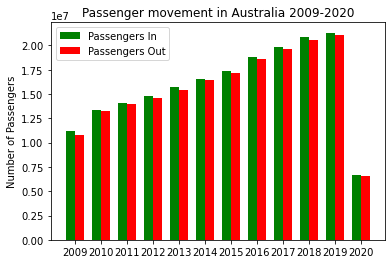

In [38]:
# choose values to plot
labels = passenger_year_df["Year"]
piyear = passenger_year_df['Passengers In']
poyear = passenger_year_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots()
passenger_in_bar = ax.bar(x - width/2, piyear, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, poyear, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Passenger movement in Australia 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [50]:
#filter data per month
# jan passengers
passengers_jan = passengers_df[passengers_df["Month"].isin(['Jan009', 'Jan010', 'Jan011', 'Jan012', 'Jan013', 'Jan014', 'Jan015', 'Jan016', 'Jan017', 'Jan018', 'Jan019', 'Jan020'])]

# feb passengers
passengers_feb = passengers_df[passengers_df["Month"].isin(['Feb009', 'Feb010', 'Feb011', 'Feb012', 'Feb013', 'Feb014', 'Feb015', 'Feb016', 'Feb017', 'Feb018', 'Feb019', 'Feb020'])]

# mar passengers
passengers_mar = passengers_df[passengers_df["Month"].isin(['Mar009', 'Mar010', 'Mar011', 'Mar012', 'Mar013', 'Mar014', 'Mar015', 'Mar016', 'Mar017', 'Mar018', 'Mar019', 'Mar020'])]

# apr passengers
passengers_apr = passengers_df[passengers_df["Month"].isin(['Apr009', 'Apr010', 'Apr011', 'Apr012', 'Apr013', 'Apr014', 'Apr015', 'Apr016', 'Apr017', 'Apr018', 'Apr019', 'Apr020'])]

# may passengers
passengers_may = passengers_df[passengers_df["Month"].isin(['May009', 'May010', 'May011', 'May012', 'May013', 'May014', 'May015', 'May016', 'May017', 'May018', 'May019', 'May020'])]

# jun passengers
passengers_jun = passengers_df[passengers_df["Month"].isin(['Jun009', 'Jun010', 'Jun011', 'Jun012', 'Jun013', 'Jun014', 'Jun015', 'Jun016', 'Jun017', 'Jun018', 'Jun019', 'Jun020'])]

# jul passengers
passengers_jul = passengers_df[passengers_df["Month"].isin(['Jul009', 'Jul010', 'Jul011', 'Jul012', 'Jul013', 'Jul014', 'Jul015', 'Jul016', 'Jul017', 'Jul018', 'Jul019', 'Jul020'])]

# aug passengers
passengers_aug = passengers_df[passengers_df["Month"].isin(['Aug009', 'Aug010', 'Aug011', 'Aug012', 'Aug013', 'Aug014', 'Aug015', 'Aug016', 'Aug017', 'Aug018', 'Aug019', 'Aug020'])]

# sep passengers
passengers_sep = passengers_df[passengers_df["Month"].isin(['Sep009', 'Sep010', 'Sep011', 'Sep012', 'Sep013', 'Sep014', 'Sep015', 'Sep016', 'Sep017', 'Sep018', 'Sep019', 'Sep020'])]

# oct passengers
passengers_oct = passengers_df[passengers_df["Month"].isin(['Oct009', 'Oct010', 'Oct011', 'Oct012', 'Oct013', 'Oct014', 'Oct015', 'Oct016', 'Oct017', 'Oct018', 'Oct019', 'Oct020'])]

# nov passengers
passengers_nov = passengers_df[passengers_df["Month"].isin(['Nov009', 'Nov010', 'Nov011', 'Nov012', 'Nov013', 'Nov014', 'Nov015', 'Nov016', 'Nov017', 'Nov018', 'Nov019', 'Nov020'])]

# dec passengers
passengers_dec = passengers_df[passengers_df["Month"].isin(['Dec009', 'Dec010', 'Dec011', 'Dec012', 'Dec013', 'Dec014', 'Dec015', 'Dec016', 'Dec017', 'Dec018', 'Dec019', 'Dec020'])]

In [51]:
# Create dataframes for every year - summed with monthly passengers in and out
# jan
passengers_jan_grouped = passengers_jan.groupby(["Month"], sort = False)
passengers_jan_grouped_in = passengers_jan_grouped["Passengers In"].sum()
passengers_jan_grouped_out = passengers_jan_grouped["Passengers In"].sum()
passengers_jan_df = pd.DataFrame({'Passengers In': passengers_jan_grouped_in,
                   'Passengers Out': passengers_jan_grouped_out})

# feb
passengers_feb_grouped = passengers_feb.groupby(["Month"], sort = False)
passengers_feb_grouped_in = passengers_feb_grouped["Passengers In"].sum()
passengers_feb_grouped_out = passengers_feb_grouped["Passengers In"].sum()
passengers_feb_df = pd.DataFrame({'Passengers In': passengers_feb_grouped_in,
                   'Passengers Out': passengers_feb_grouped_out})

# mar
passengers_mar_grouped = passengers_mar.groupby(["Month"], sort = False)
passengers_mar_grouped_in = passengers_mar_grouped["Passengers In"].sum()
passengers_mar_grouped_out = passengers_mar_grouped["Passengers In"].sum()
passengers_mar_df = pd.DataFrame({'Passengers In': passengers_mar_grouped_in,
                   'Passengers Out': passengers_mar_grouped_out})

# apr
passengers_apr_grouped = passengers_apr.groupby(["Month"], sort = False)
passengers_apr_grouped_in = passengers_apr_grouped["Passengers In"].sum()
passengers_apr_grouped_out = passengers_apr_grouped["Passengers In"].sum()
passengers_apr_df = pd.DataFrame({'Passengers In': passengers_apr_grouped_in,
                   'Passengers Out': passengers_apr_grouped_out})

# may
passengers_may_grouped = passengers_may.groupby(["Month"], sort = False)
passengers_may_grouped_in = passengers_may_grouped["Passengers In"].sum()
passengers_may_grouped_out = passengers_may_grouped["Passengers In"].sum()
passengers_may_df = pd.DataFrame({'Passengers In': passengers_may_grouped_in,
                   'Passengers Out': passengers_may_grouped_out})

# jun
passengers_jun_grouped = passengers_jun.groupby(["Month"], sort = False)
passengers_jun_grouped_in = passengers_jun_grouped["Passengers In"].sum()
passengers_jun_grouped_out = passengers_jun_grouped["Passengers In"].sum()
passengers_jun_df = pd.DataFrame({'Passengers In': passengers_jun_grouped_in,
                   'Passengers Out': passengers_jun_grouped_out})

# jul
passengers_jul_grouped = passengers_jul.groupby(["Month"], sort = False)
passengers_jul_grouped_in = passengers_jul_grouped["Passengers In"].sum()
passengers_jul_grouped_out = passengers_jul_grouped["Passengers In"].sum()
passengers_jul_df = pd.DataFrame({'Passengers In': passengers_jul_grouped_in,
                   'Passengers Out': passengers_jul_grouped_out})

# aug
passengers_aug_grouped = passengers_aug.groupby(["Month"], sort = False)
passengers_aug_grouped_in = passengers_aug_grouped["Passengers In"].sum()
passengers_aug_grouped_out = passengers_aug_grouped["Passengers In"].sum()
passengers_aug_df = pd.DataFrame({'Passengers In': passengers_aug_grouped_in,
                   'Passengers Out': passengers_aug_grouped_out})

# sep
passengers_sep_grouped = passengers_sep.groupby(["Month"], sort = False)
passengers_sep_grouped_in = passengers_sep_grouped["Passengers In"].sum()
passengers_sep_grouped_out = passengers_sep_grouped["Passengers In"].sum()
passengers_sep_df = pd.DataFrame({'Passengers In': passengers_sep_grouped_in,
                   'Passengers Out': passengers_sep_grouped_out})

# oct
passengers_oct_grouped = passengers_oct.groupby(["Month"], sort = False)
passengers_oct_grouped_in = passengers_oct_grouped["Passengers In"].sum()
passengers_oct_grouped_out = passengers_oct_grouped["Passengers In"].sum()
passengers_oct_df = pd.DataFrame({'Passengers In': passengers_oct_grouped_in,
                   'Passengers Out': passengers_oct_grouped_out})

# nov
passengers_nov_grouped = passengers_nov.groupby(["Month"], sort = False)
passengers_nov_grouped_in = passengers_nov_grouped["Passengers In"].sum()
passengers_nov_grouped_out = passengers_nov_grouped["Passengers In"].sum()
passengers_nov_df = pd.DataFrame({'Passengers In': passengers_nov_grouped_in,
                   'Passengers Out': passengers_nov_grouped_out})

# dec
passengers_dec_grouped = passengers_dec.groupby(["Month"], sort = False)
passengers_dec_grouped_in = passengers_dec_grouped["Passengers In"].sum()
passengers_dec_grouped_out = passengers_dec_grouped["Passengers In"].sum()
passengers_dec_df = pd.DataFrame({'Passengers In': passengers_dec_grouped_in,
                   'Passengers Out': passengers_dec_grouped_out})

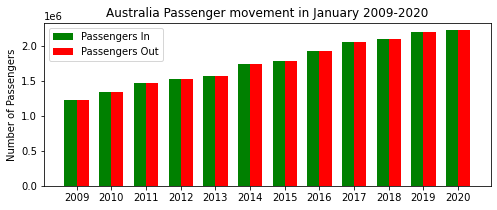

In [83]:
# choose values to plot - jan
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pijan = passengers_jan_df['Passengers In']
pojan = passengers_jan_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, pijan, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, pojan, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in January 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

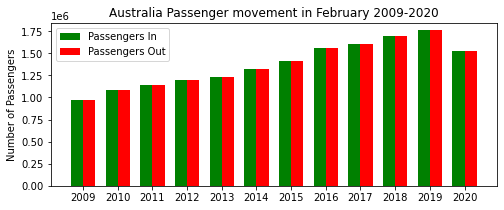

In [84]:
# choose values to plot - feb
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pifeb = passengers_feb_df['Passengers In']
pofeb = passengers_feb_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, pifeb, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, pofeb, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in February 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

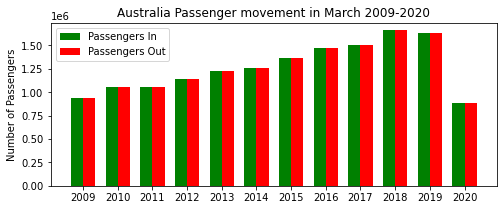

In [85]:
# choose values to plot - mar
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pimar = passengers_mar_df['Passengers In']
pomar = passengers_mar_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, pimar, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, pomar, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in March 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

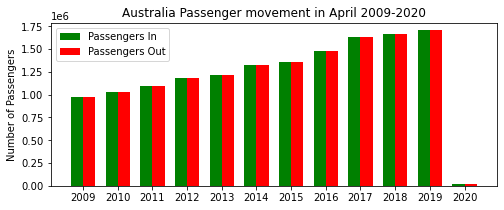

In [86]:
# choose values to plot - apr
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
piapr = passengers_apr_df['Passengers In']
poapr = passengers_apr_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, piapr, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, poapr, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in April 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

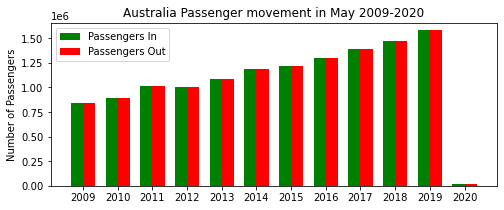

In [87]:
# choose values to plot - may
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pimay = passengers_may_df['Passengers In']
pomay = passengers_may_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, pimay, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, pomay, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in May 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

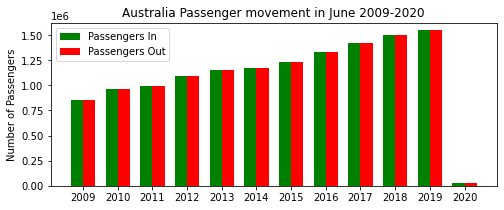

In [88]:
# choose values to plot - jun
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pijun = passengers_jun_df['Passengers In']
pojun = passengers_jun_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, pijun, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, pojun, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in June 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

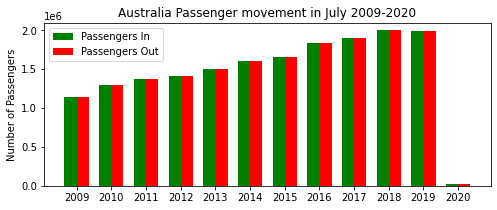

In [89]:
# choose values to plot - jul
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pijul = passengers_jul_df['Passengers In']
pojul = passengers_jul_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, pijul, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, pojul, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in July 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

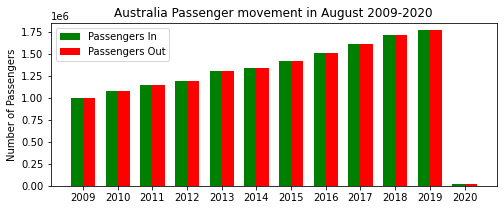

In [90]:
# choose values to plot - aug
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
piaug = passengers_aug_df['Passengers In']
poaug = passengers_aug_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, piaug, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, poaug, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in August 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

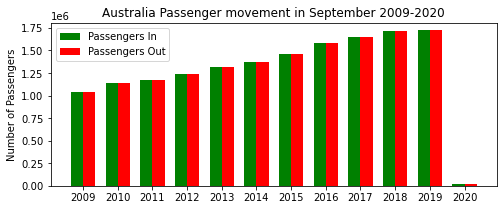

In [91]:
# choose values to plot - sep
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pisep = passengers_sep_df['Passengers In']
posep = passengers_sep_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, pisep, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, posep, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in September 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

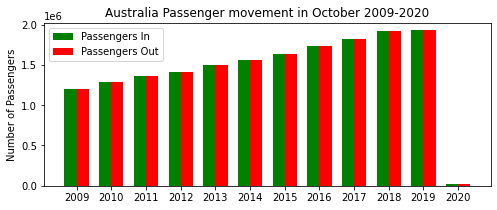

In [92]:
# choose values to plot - oct
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pioct = passengers_oct_df['Passengers In']
pooct = passengers_oct_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, pioct, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, pooct, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in October 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

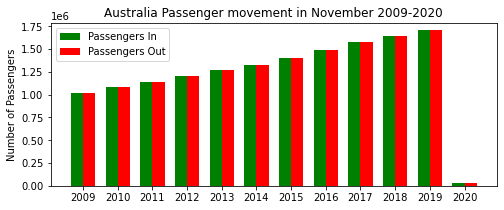

In [93]:
# choose values to plot - nov
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pinov = passengers_nov_df['Passengers In']
ponov = passengers_nov_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, pinov, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, ponov, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in November 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

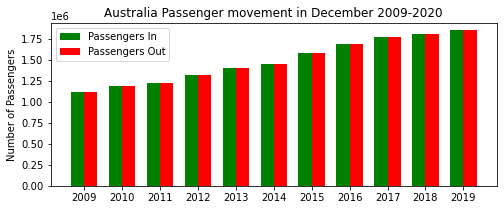

In [95]:
# choose values to plot - dec
labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
pidec = passengers_dec_df['Passengers In']
podec = passengers_dec_df['Passengers Out']

# the label locations
x = np.arange(len(labels))
# the width of the bars  
width = 0.35  

#plot graph
fig, ax = plt.subplots(figsize=(8,3))
passenger_in_bar = ax.bar(x - width/2, pidec, width, label='Passengers In', color = "green")
passenger_out_bar = ax.bar(x + width/2, podec, width, label='Passengers Out', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Passengers')
ax.set_title('Australia Passenger movement in December 2009-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [47]:
# create data frame by year and number of passengers in/out (including 2020)
passenger_in_year_grouped = passengers_df.groupby(["Year"])["Passengers In"].sum()
passenger_out_year_grouped = passengers_df.groupby(["Year"])["Passengers Out"].sum()
passenger_year_df = pd.DataFrame({'Passengers In': passenger_in_year_grouped,
                   'Passengers Out': passenger_out_year_grouped})
passenger_year_df = passenger_year_df.reset_index()

In [48]:
# create data frame by year and number of passengers in/out (excluding 2020)
passenger_year_19_df = passenger_year_df[~passenger_year_df["Year"].isin(['2020'])]

Text(0, 0.5, 'Number of Passengers')

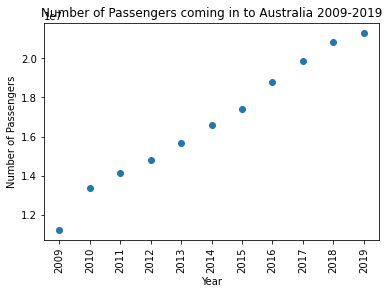

In [49]:
# Generate a scatter plot of year versus passengers in
year = passenger_year_19_df.iloc[:,0]
passengers_in_2009 = passenger_year_19_df.iloc[:,1]
plt.scatter(year,passengers_in_2009)
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

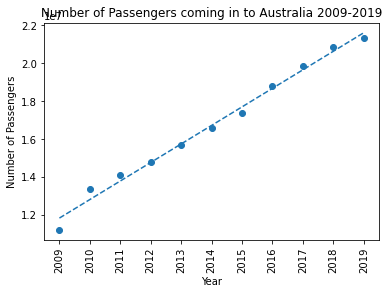

In [50]:
 # Perform a linear regression on year versus violent crime rate
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_2009)

 # Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * year + vc_int

# Plot the linear model on top of scatter plot 
year = passenger_year_19_df.iloc[:,0]
passengers_in_2009 = passenger_year_19_df.iloc[:,1]
plt.scatter(year,passengers_in_2009)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [51]:
# Calculate the incoming passengers for 2020
year = 2020
year_2020_predict_in = round(vc_slope * year + vc_int,2)
year_2020_predict_in

22586277.76

In [54]:
# add predicted 2020 values to passenger_year_19_df
new_row = {'Year': 2020, 'Passengers In': year_2020_predict_in}
#append row to the dataframe
passenger_year_19_df = passenger_year_19_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

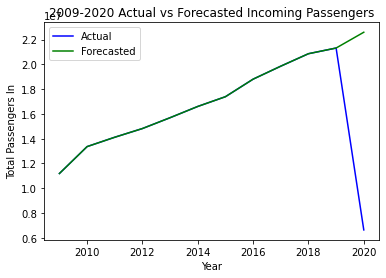

In [55]:
# plot graph showing overall expected vs real 2020 values - incoming
x_year_predict = passenger_year_19_df["Year"]
y_year_act = passenger_year_df["Passengers In"]
y_year_pred = passenger_year_19_df["Passengers In"]
plt.plot(x_year_predict, y_year_act, label='Actual', color='blue')
plt.plot(x_year_predict, y_year_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("2009-2020 Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")